# Proyecto de clustering de segmentación de países por datos socio-económicos

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [ ]:
df_country = pd.read_csv("/content/Country-data.csv")

In [ ]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Manejando valores nulos

In [ ]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Validando duplicados

In [ ]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Análisis de distribución

In [ ]:
int_columns = df_country.select_dtypes(exclude = "object").columns

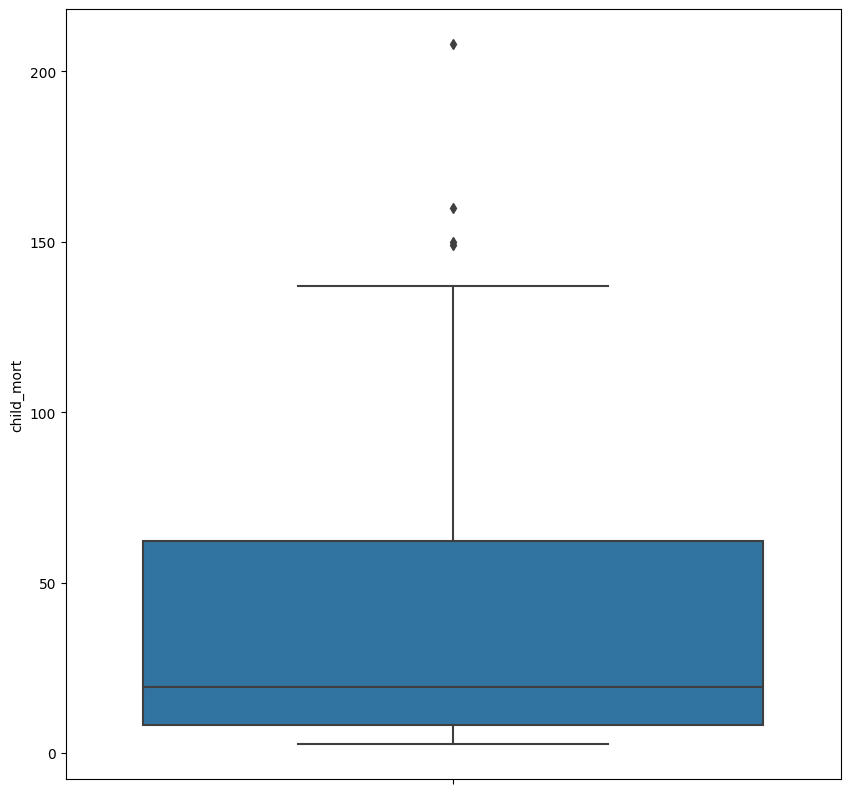

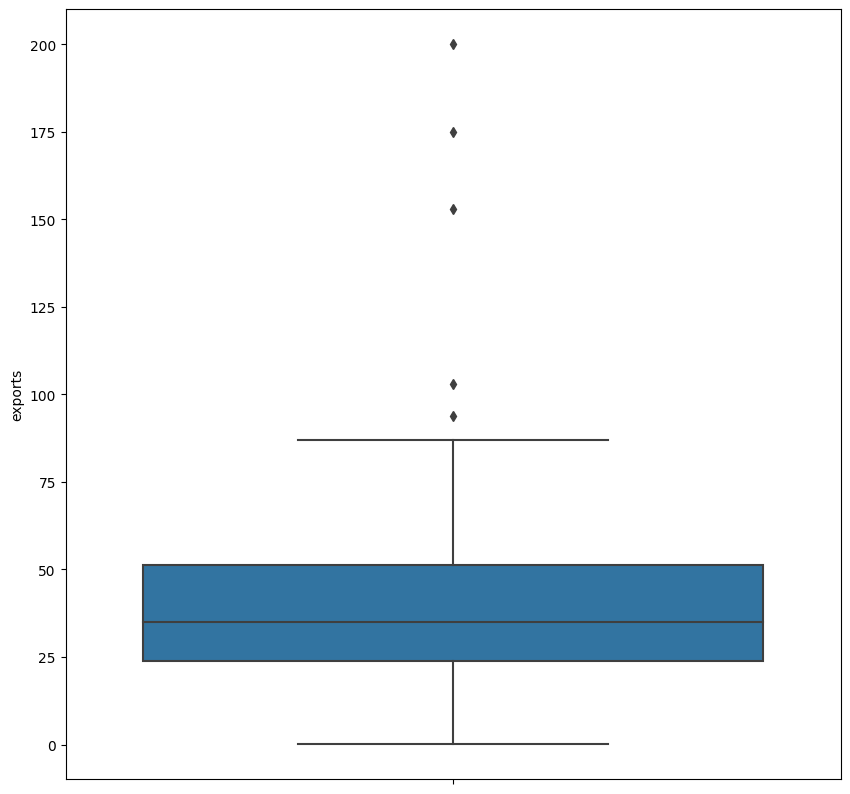

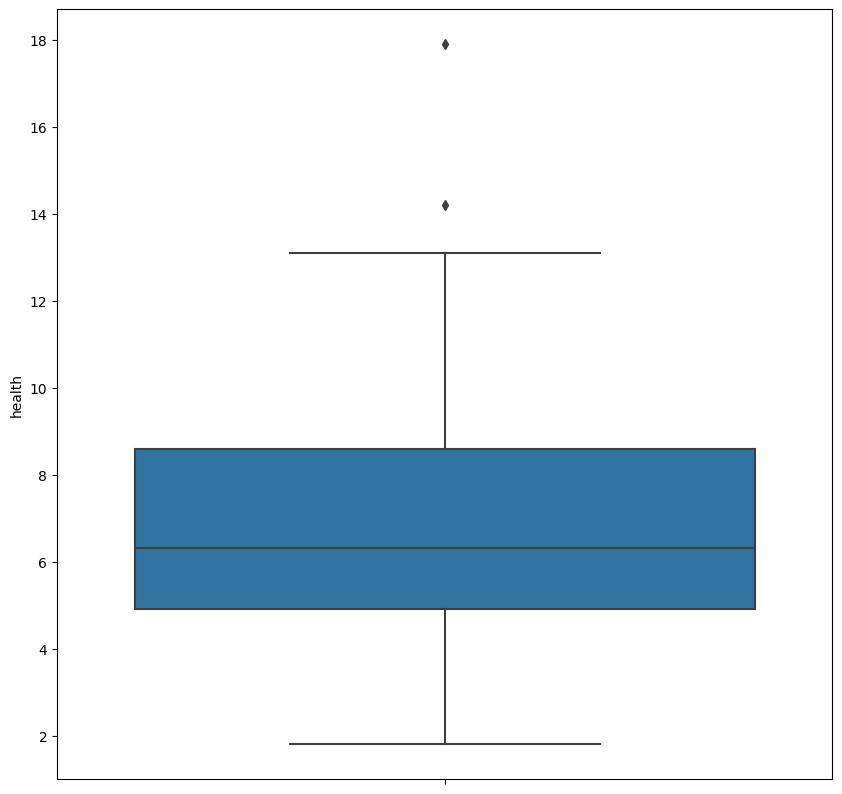

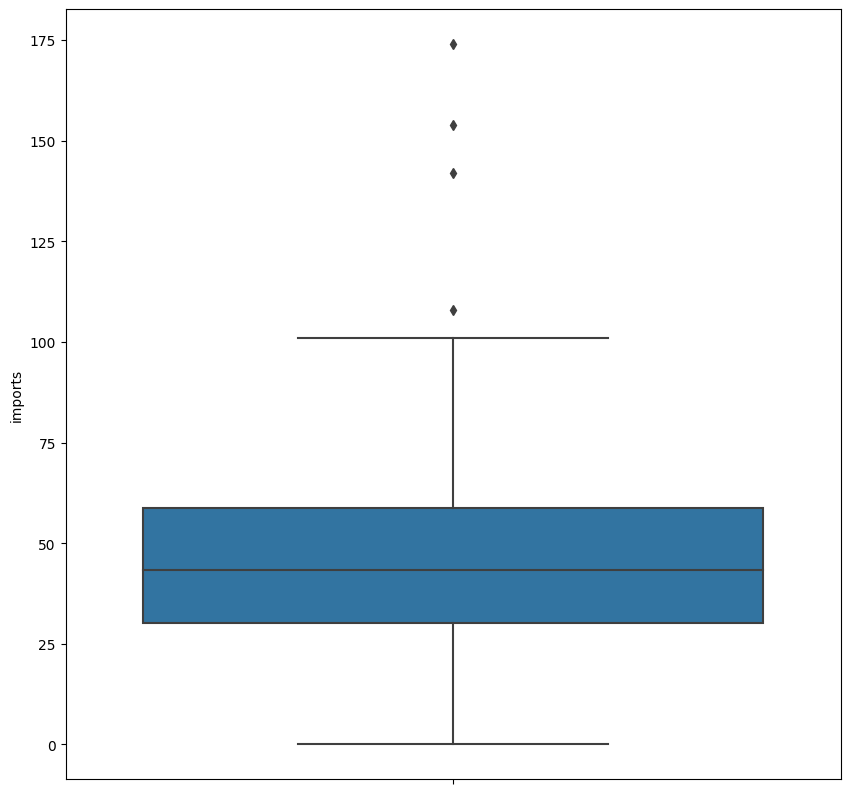

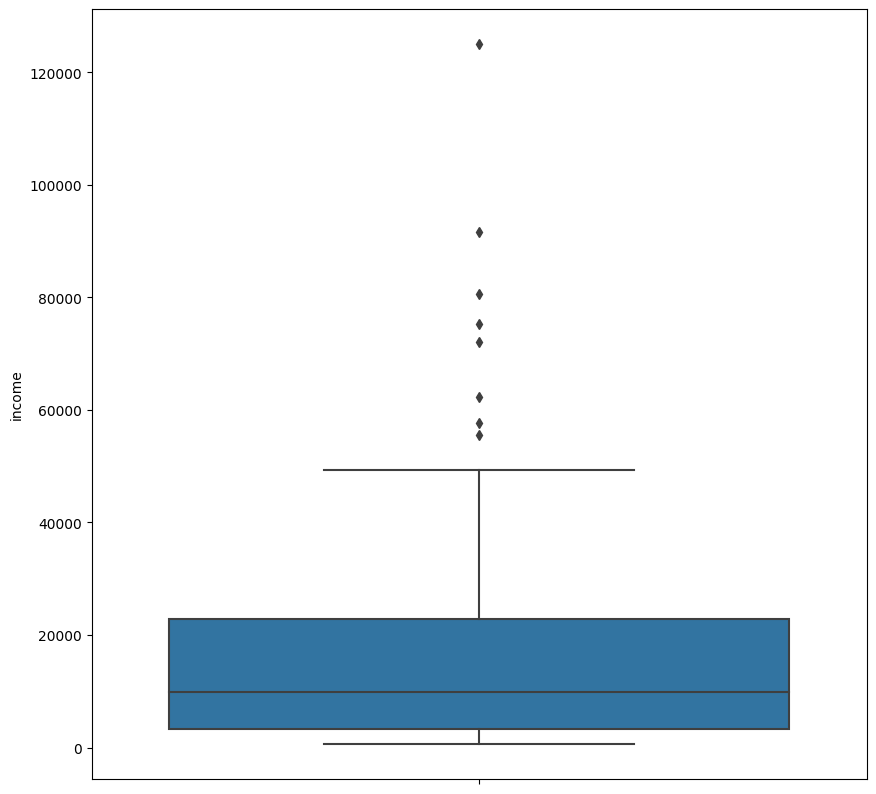

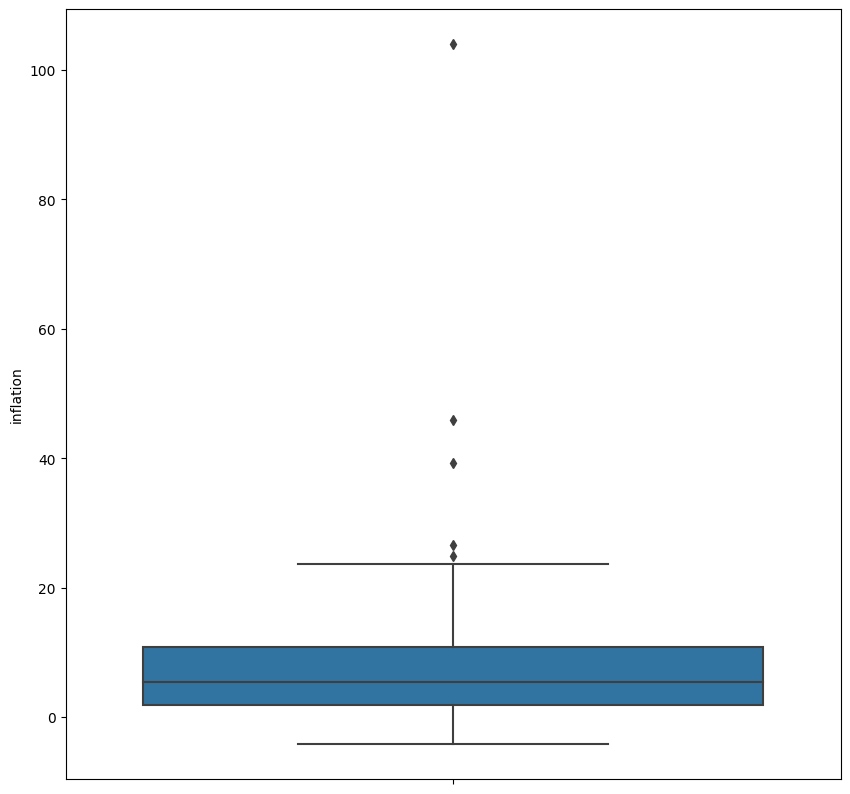

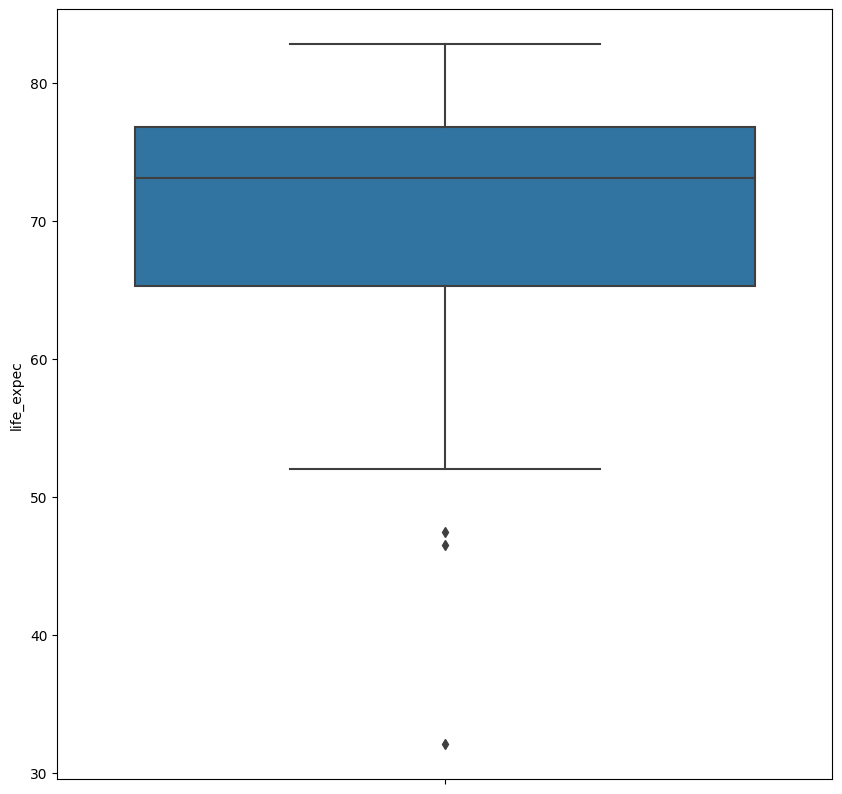

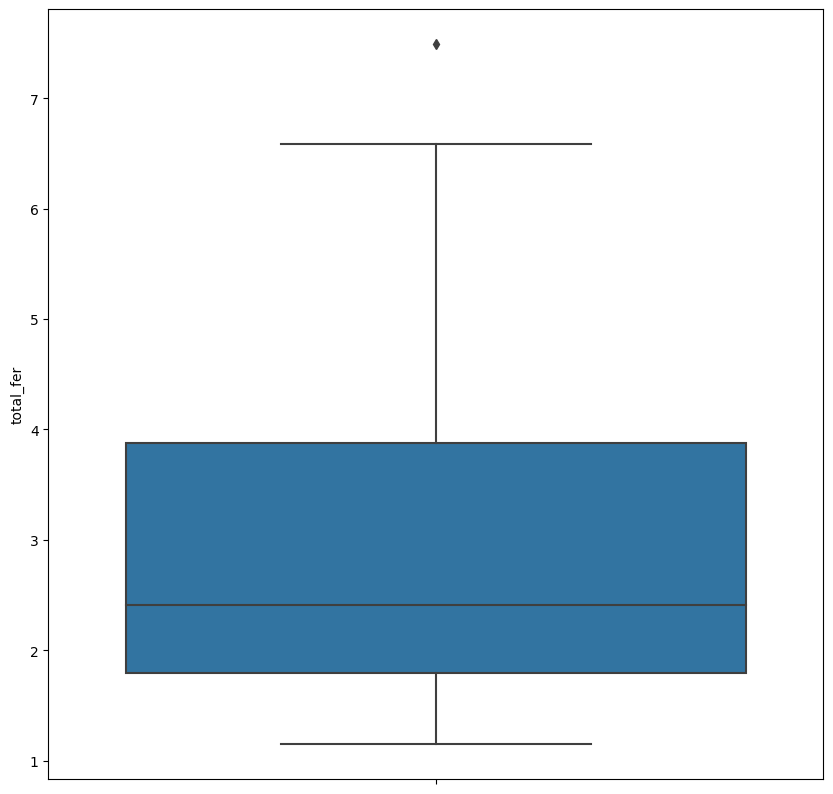

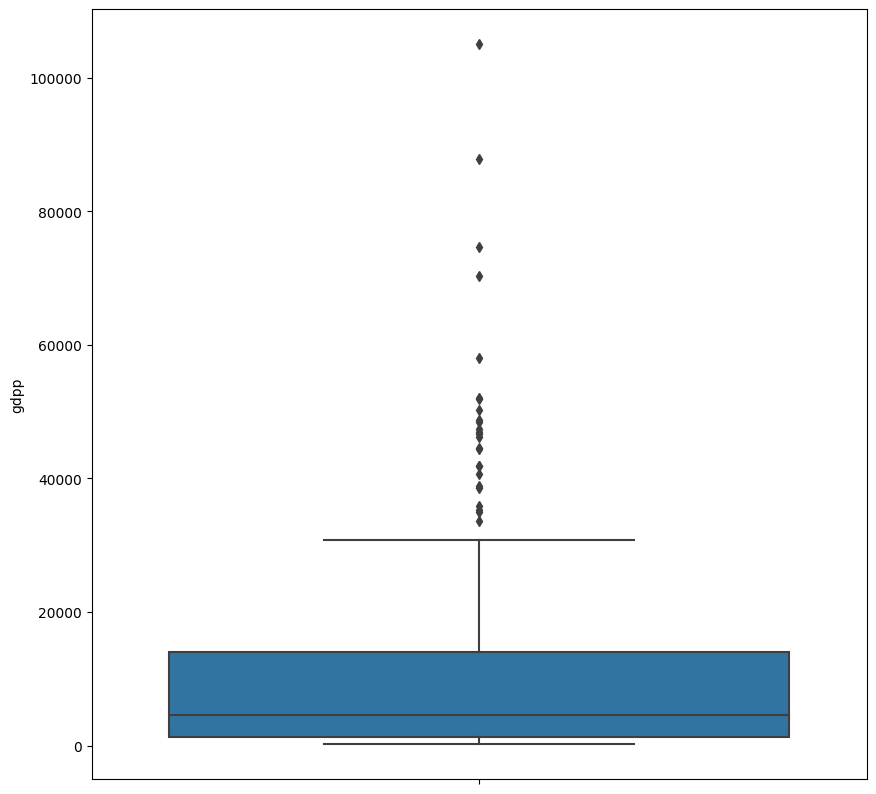

In [ ]:
for _ in int_columns:
  plt.figure(figsize = (10,10))
  sns.boxplot(data = df_country, y = _)
  plt.show()

<ipython-input-10-84333b0e5678>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df_country.corr(), cmap = "coolwarm", annot = True)


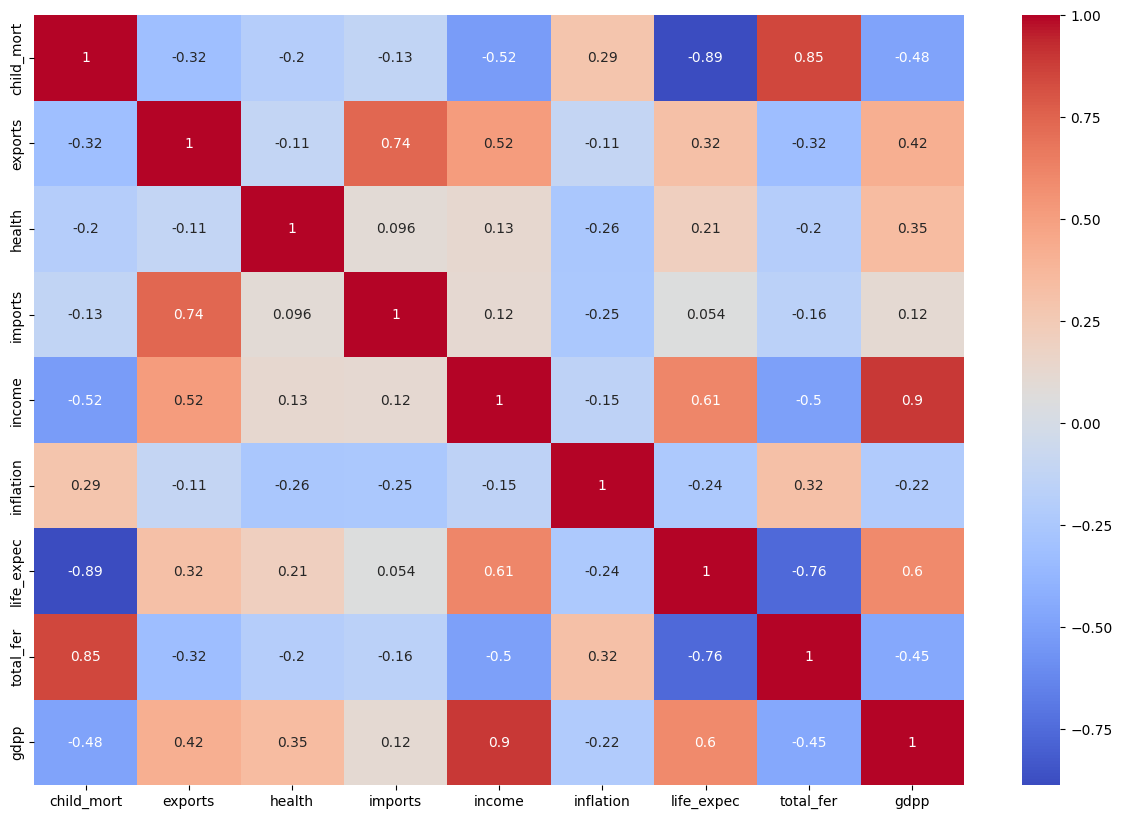

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df_country.corr(), cmap = "coolwarm", annot = True)
plt.show()

In [ ]:
df_country[df_country["life_expec"] == df_country["life_expec"].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


## Escalar datos

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country.drop("country", axis = 1))

In [ ]:
df_country_scaled = pd.DataFrame(data = df_country_scaled, columns = df_country.drop("country", axis = 1).columns)
df_country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [ ]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [ ]:
pca.feature_names_in_

array(['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype=object)

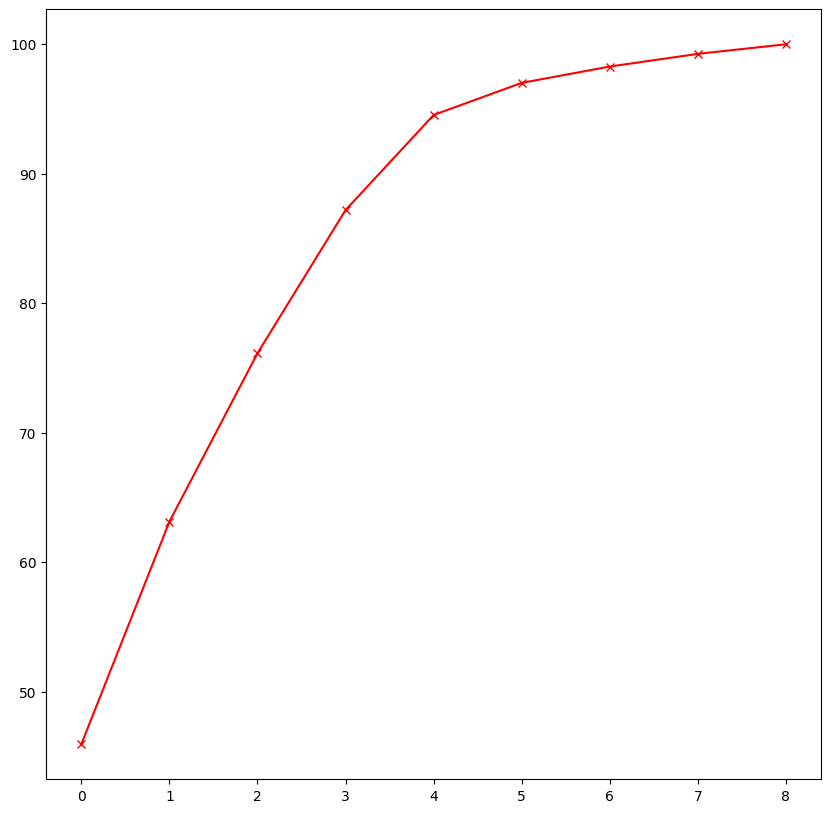

In [ ]:
cum_var = np.cumsum(np.round(var, decimals = 4)*100)

plt.figure(figsize = (10,10))
plt.plot(cum_var, "r-x")
plt.show()

In [ ]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8], axis =1, inplace = True)

In [ ]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


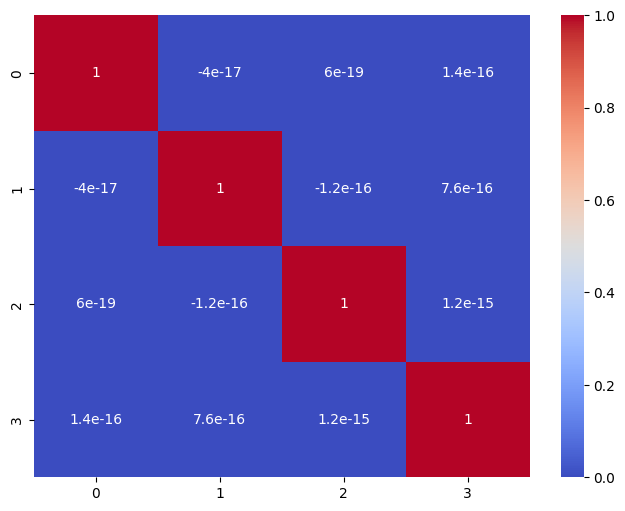

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(data = pca_data_standard.corr(), cmap = "coolwarm", annot = True)
plt.show()

## Importar librerías para clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means

### PCA

In [ ]:
Sum_of_square_distances = []
silhouette_scores = []
K = np.arange(2,15)
for _ in K:
  km = KMeans(n_clusters = _)
  y_predict = km.fit_predict(pca_data_standard)
  Sum_of_square_distances.append(km.inertia_)
  silhouette_scores.append(silhouette_score(pca_data_standard, y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

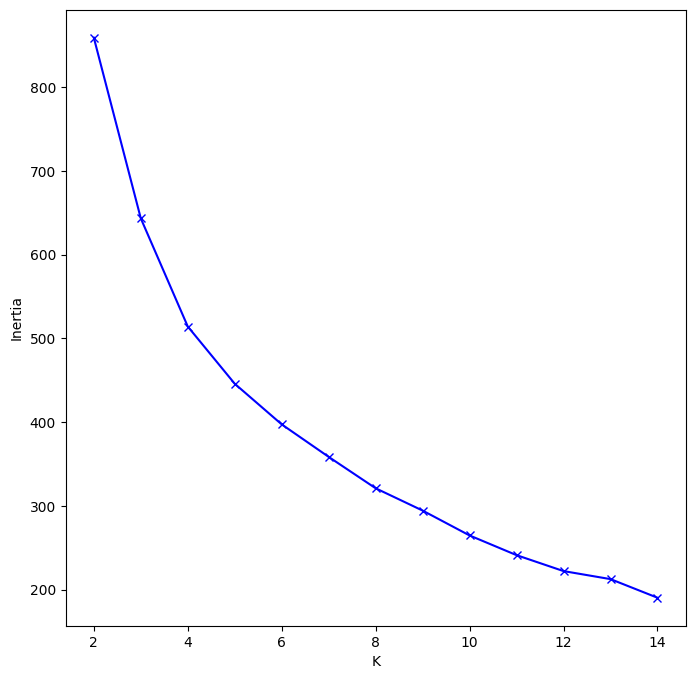

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(K, Sum_of_square_distances, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

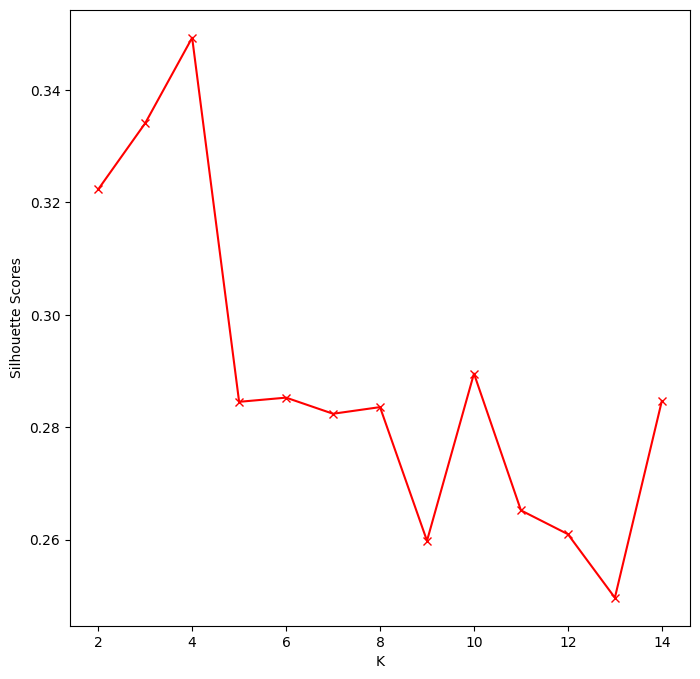

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(K, silhouette_scores, "rx-")
plt.xlabel("K")
plt.ylabel("Silhouette Scores")
plt.show()

In [ ]:
km = KMeans(n_clusters = 4)
y_predict = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_predict))
df_country["k_neans_pca"]  = y_predict

0.34930392685434886


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Sin PCA

In [ ]:
Sum_of_square_distances = []
silhouette_scores = []
K = np.arange(2,15)
for _ in K:
  km = KMeans(n_clusters = _)
  y_predict = km.fit_predict(df_country_scaled)
  Sum_of_square_distances.append(km.inertia_)
  silhouette_scores.append(silhouette_score(df_country_scaled, y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

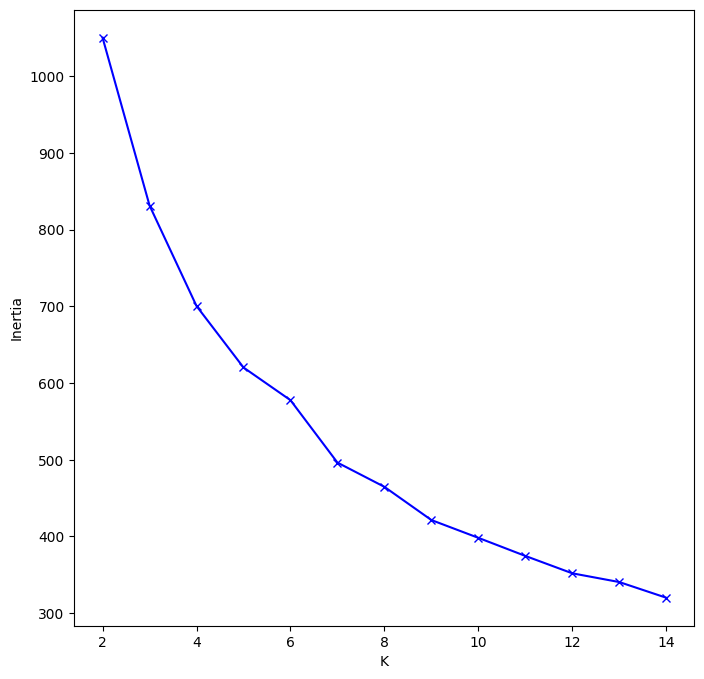

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(K, Sum_of_square_distances, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

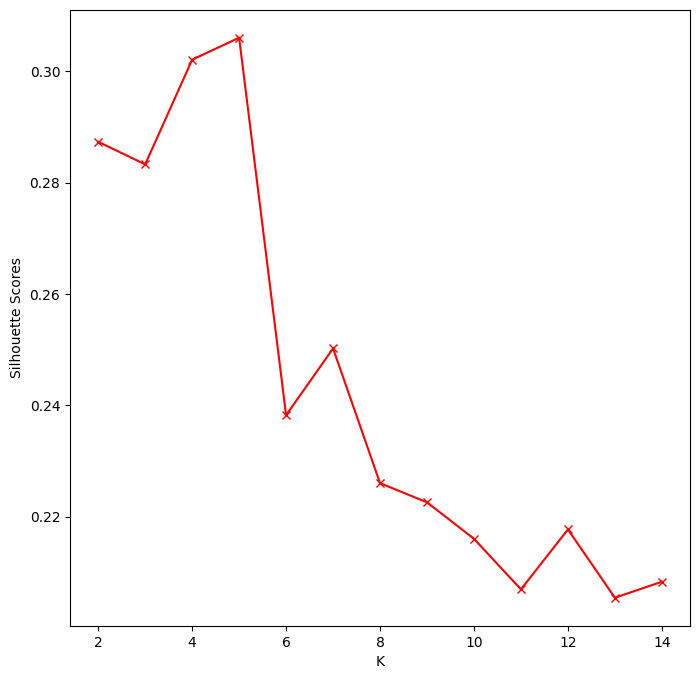

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(K, silhouette_scores, "rx-")
plt.xlabel("K")
plt.ylabel("Silhouette Scores")
plt.show()

In [ ]:
km = KMeans(n_clusters = 5)
y_predict = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_predict))
df_country["k_neans"]  = y_predict

0.22423864481525485


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Agglomerativen hierarchical clustering

### PCA

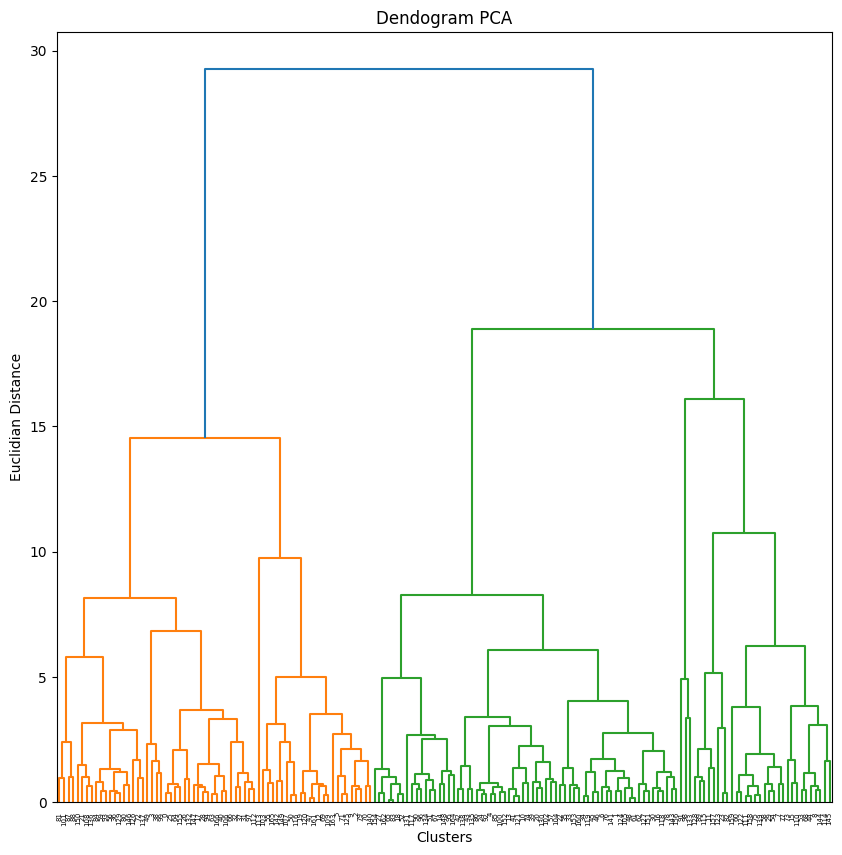

In [ ]:
plt.figure(figsize = (10,10))
dendogram_plot = dendrogram(linkage(pca_data_standard, method = "ward"))
plt.title("Dendogram PCA")
plt.xlabel("Clusters")
plt.ylabel("Euclidian Distance")
plt.show()


In [ ]:
hc = AgglomerativeClustering( n_clusters = 2, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df_country["hc_pca"] = y_hc

0.3070110704080526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Sin PCA

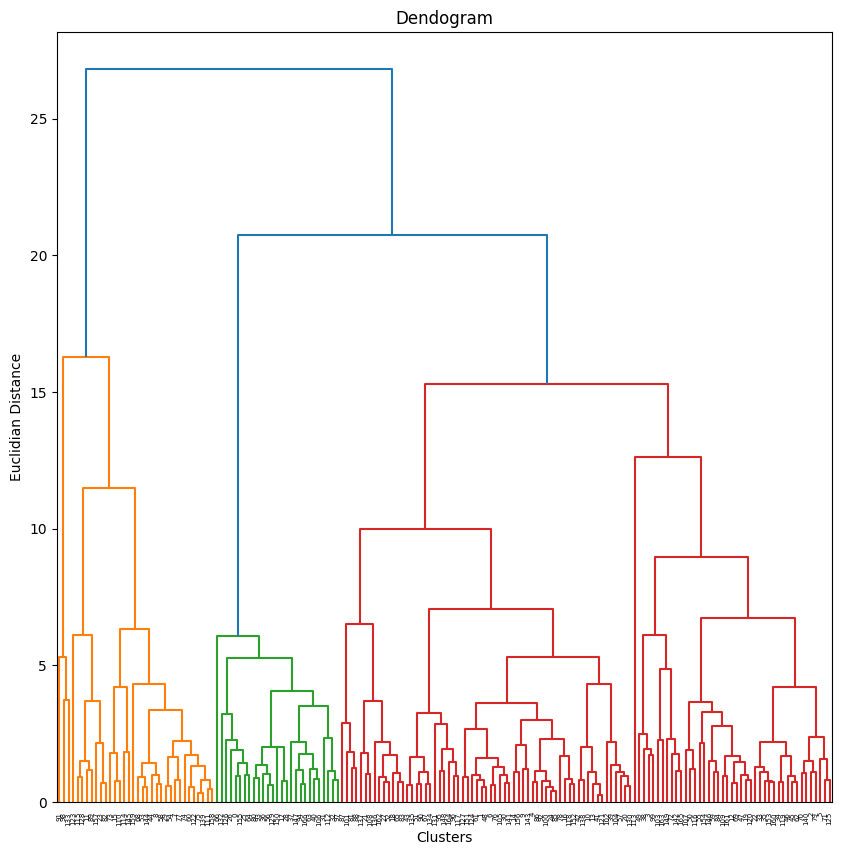

In [ ]:
plt.figure(figsize = (10,10))
dendogram_plot = dendrogram(linkage(df_country_scaled, method = "ward"))
plt.title("Dendogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidian Distance")
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward" )
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))
df_country["hc"] = y_hc

0.3153134331018189


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## DBSCAN

### PCA

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors =  NearestNeighbors(n_neighbors = 2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, index = neighbors_fit.kneighbors(pca_data_standard)

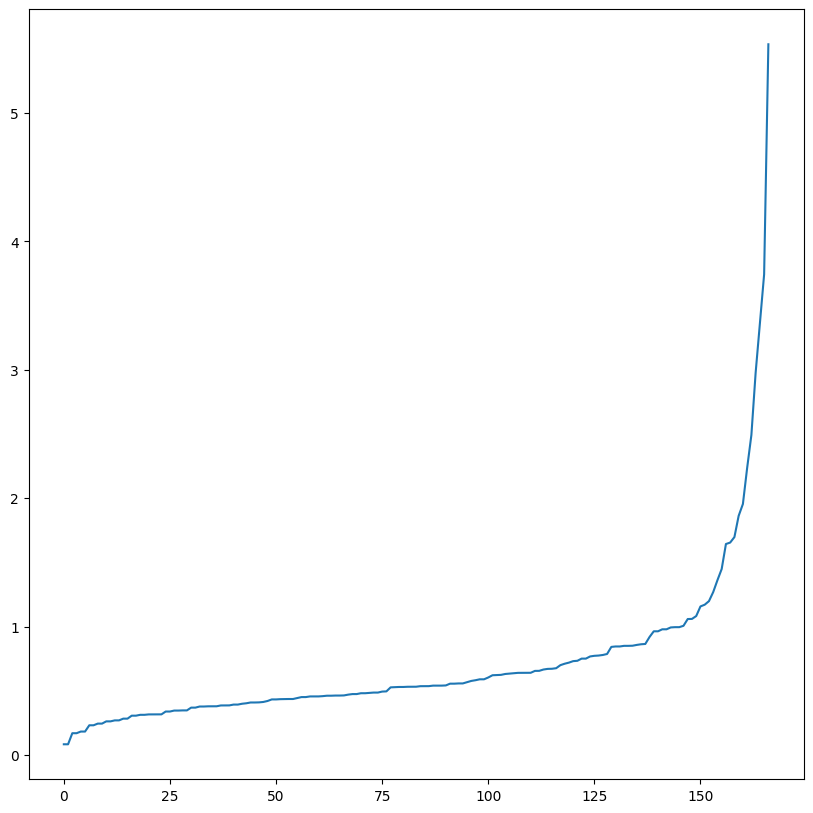

In [ ]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
fig = plt.figure(figsize = (10,10))
plt.plot(distances)

In [ ]:
eps_values = np.arange(0.5, 2.0, 0.05)
min_samples = np.arange(2,12,1)

In [ ]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_params:
  y_dbscan = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(pca_data_standard)
  try:
    sil_score.append(silhouette_score(pca_data_standard, y_dbscan)) # Lo colocamos dentro del Try except por que para algunos parametros marca error
  except:
    sil_score.append(0)
  no_of_clusters.append(len(pd.unique(y_dbscan)))


In [ ]:
df_param_tunning = pd.DataFrame.from_records(data = dbscan_params, columns = ["Eps", "Min_samples"])
df_param_tunning["sil_score"] = sil_score
df_param_tunning["n_clusters"] = no_of_clusters


In [ ]:
pivot_1 =pd.pivot_table(data = df_param_tunning, values = "sil_score", columns = "Eps", index = "Min_samples" )
pivot_2 =pd.pivot_table(data = df_param_tunning, values = "n_clusters", columns = "Eps", index = "Min_samples" )

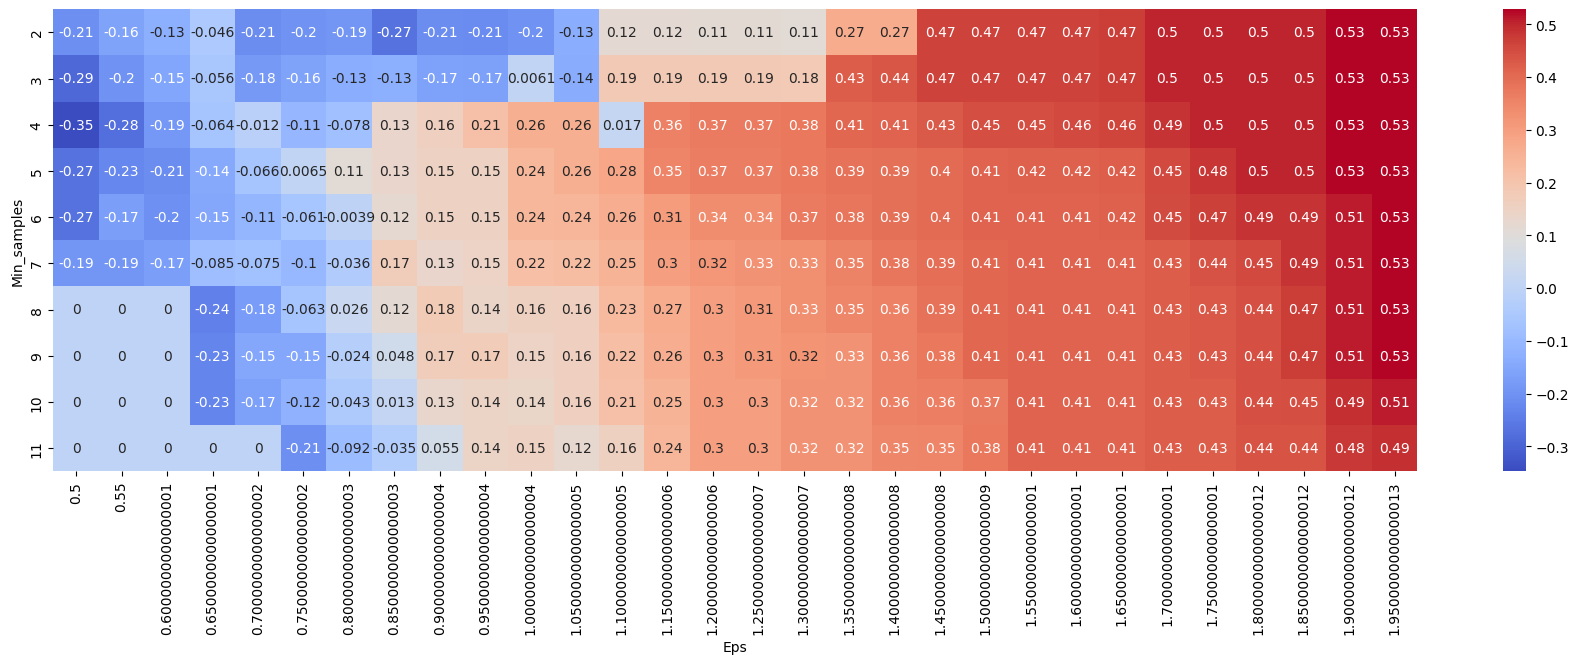

In [ ]:
fig, ax = plt.subplots(figsize = (22,6))
sns.heatmap(data = pivot_1, cmap = "coolwarm", annot = True, annot_kws = {"size" : 10}, ax = ax)
plt.show()

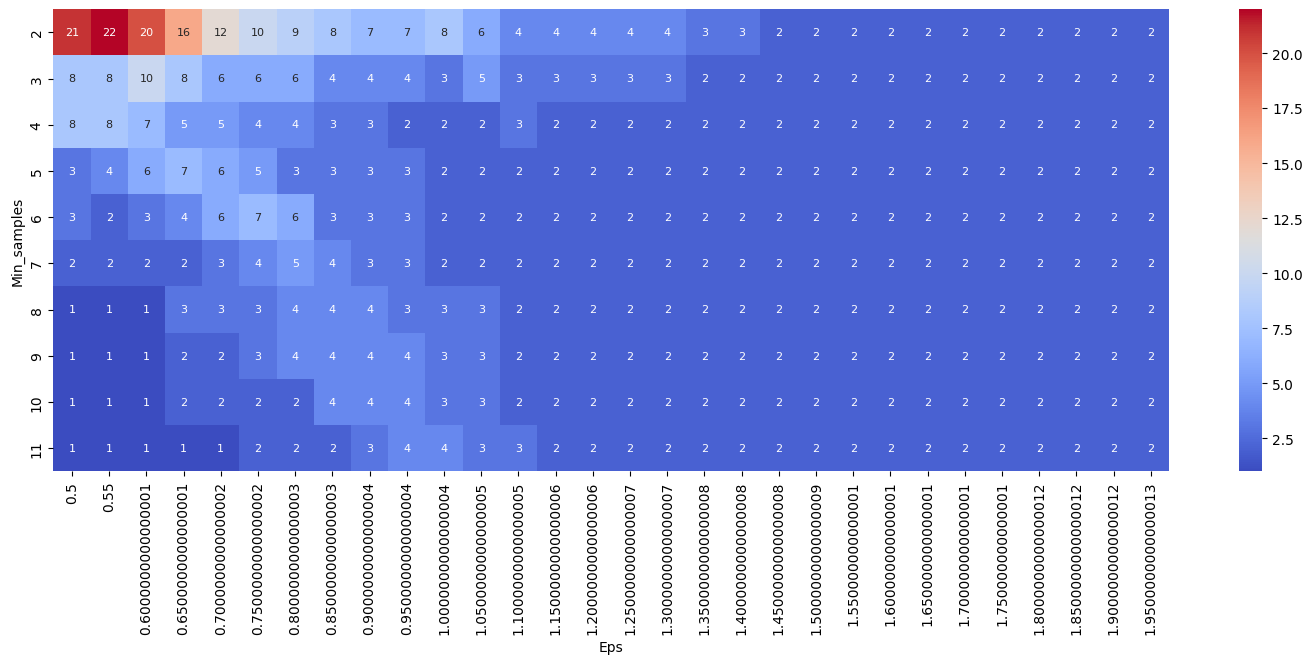

In [ ]:
plt.figure(figsize = (18,6))
sns.heatmap(data = pivot_2, cmap = "coolwarm", annot = True, annot_kws = {"size" : 8})
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 1.2, min_samples = 3)
y_dbscan = dbscan.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan))
df_country["dbscan_pca"] = y_dbscan


0.18591175730784343


### Sin PCA

In [ ]:
neighbors =  NearestNeighbors(n_neighbors = 2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, index = neighbors_fit.kneighbors(df_country_scaled)

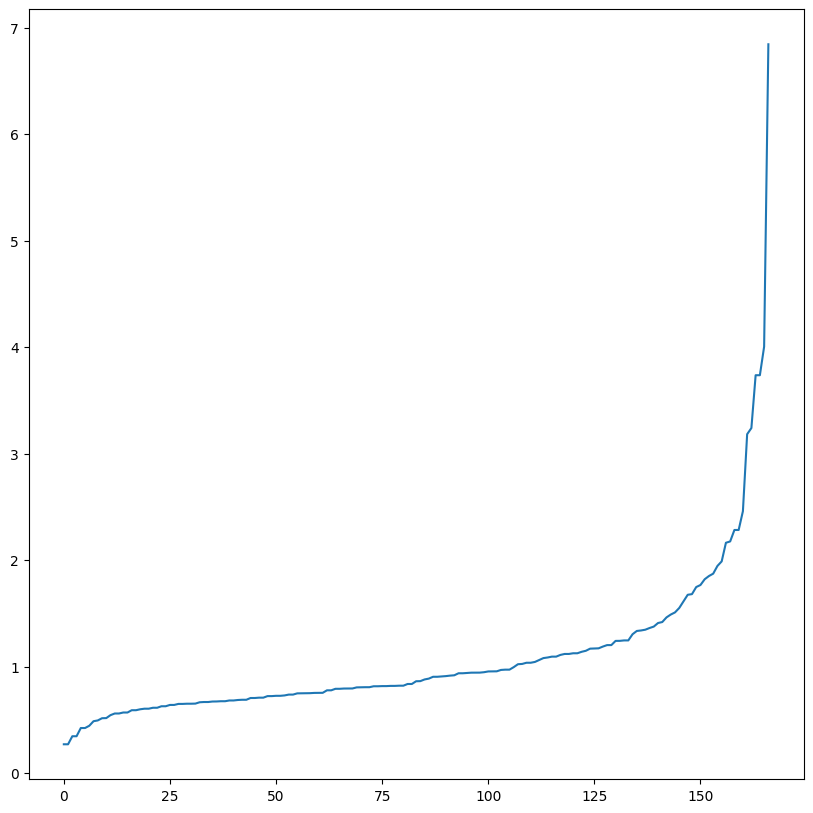

In [ ]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
fig = plt.figure(figsize = (10,10))
plt.plot(distances)

In [ ]:
eps_values = np.arange(1.0, 3.5, 0.1)
min_samples = np.arange(2,12,1)

In [ ]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_params:
  y_dbscan = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(df_country_scaled)
  try:
    sil_score.append(silhouette_score(df_country_scaled, y_dbscan)) # Lo colocamos dentro del Try except por que para algunos parametros marca error
  except:
    sil_score.append(0)
  no_of_clusters.append(len(pd.unique(y_dbscan)))

In [ ]:
df_param_tunning = pd.DataFrame.from_records(data = dbscan_params, columns = ["Eps", "Min_samples"])
df_param_tunning["sil_score"] = sil_score
df_param_tunning["n_clusters"] = no_of_clusters

In [ ]:
pivot_1 =pd.pivot_table(data = df_param_tunning, values = "sil_score", columns = "Eps", index = "Min_samples" )
pivot_2 =pd.pivot_table(data = df_param_tunning, values = "n_clusters", columns = "Eps", index = "Min_samples" )

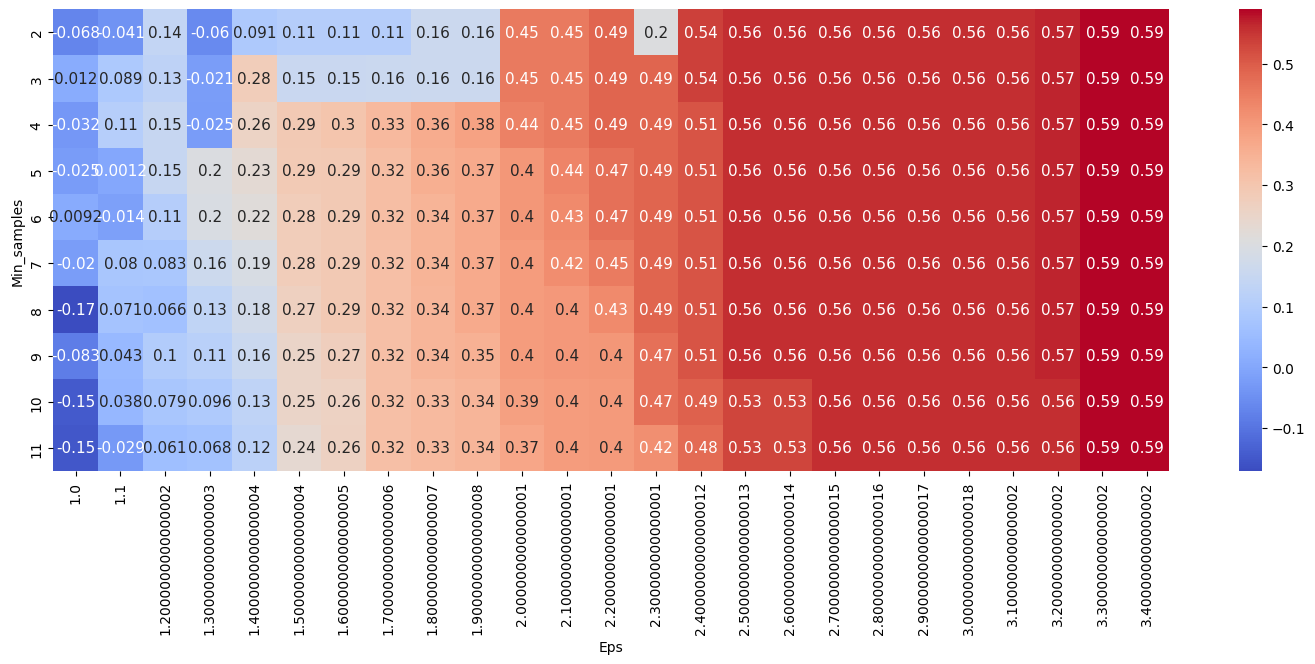

In [ ]:
fig, ax = plt.subplots(figsize = (18,6))
sns.heatmap(data = pivot_1, cmap = "coolwarm", annot = True, annot_kws = {"size" : 11}, ax = ax)
plt.show()

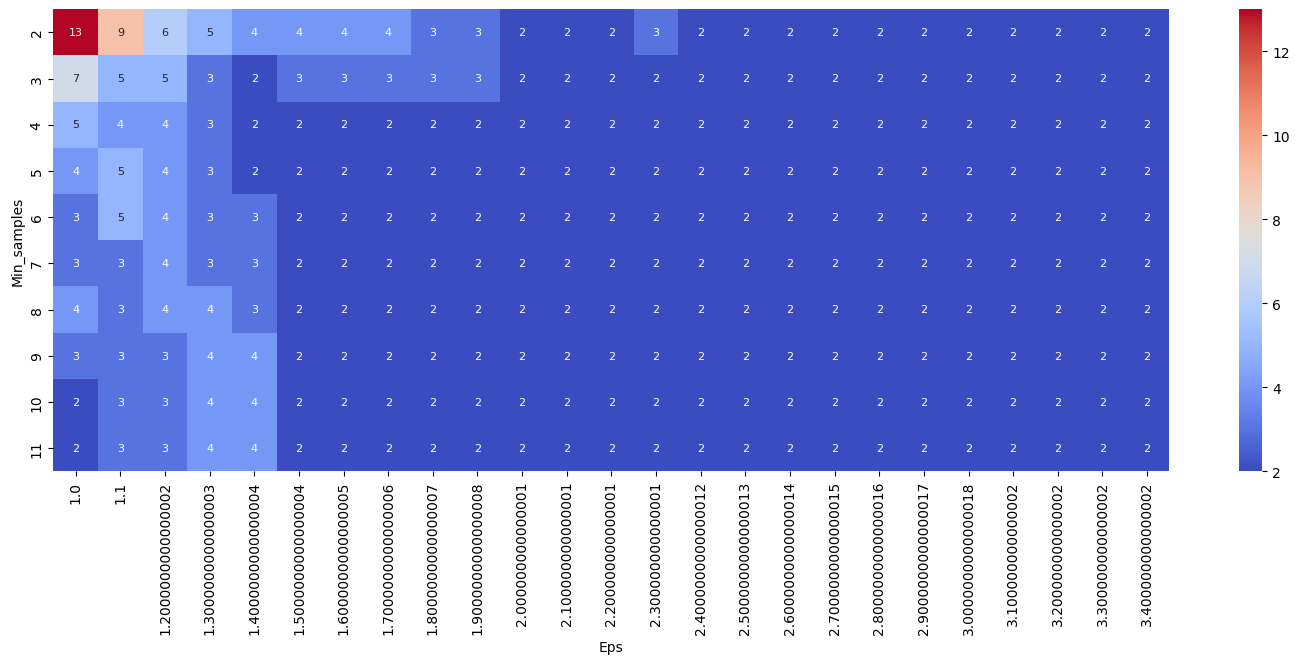

In [ ]:
plt.figure(figsize = (18,6))
sns.heatmap(data = pivot_2, cmap = "coolwarm", annot = True, annot_kws = {"size" : 8})
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 1.4, min_samples = 6)
y_dbscan = dbscan.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_dbscan))
df_country["dbscan"] = y_dbscan

0.21539651251091044


## Evaluación de resultados

In [ ]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_neans_pca,k_neans,hc_pca,hc,dbscan_pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,2,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,3,1,0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,2,1,0,-1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,0,0,0,1


In [ ]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_neans_pca',
       'k_neans', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

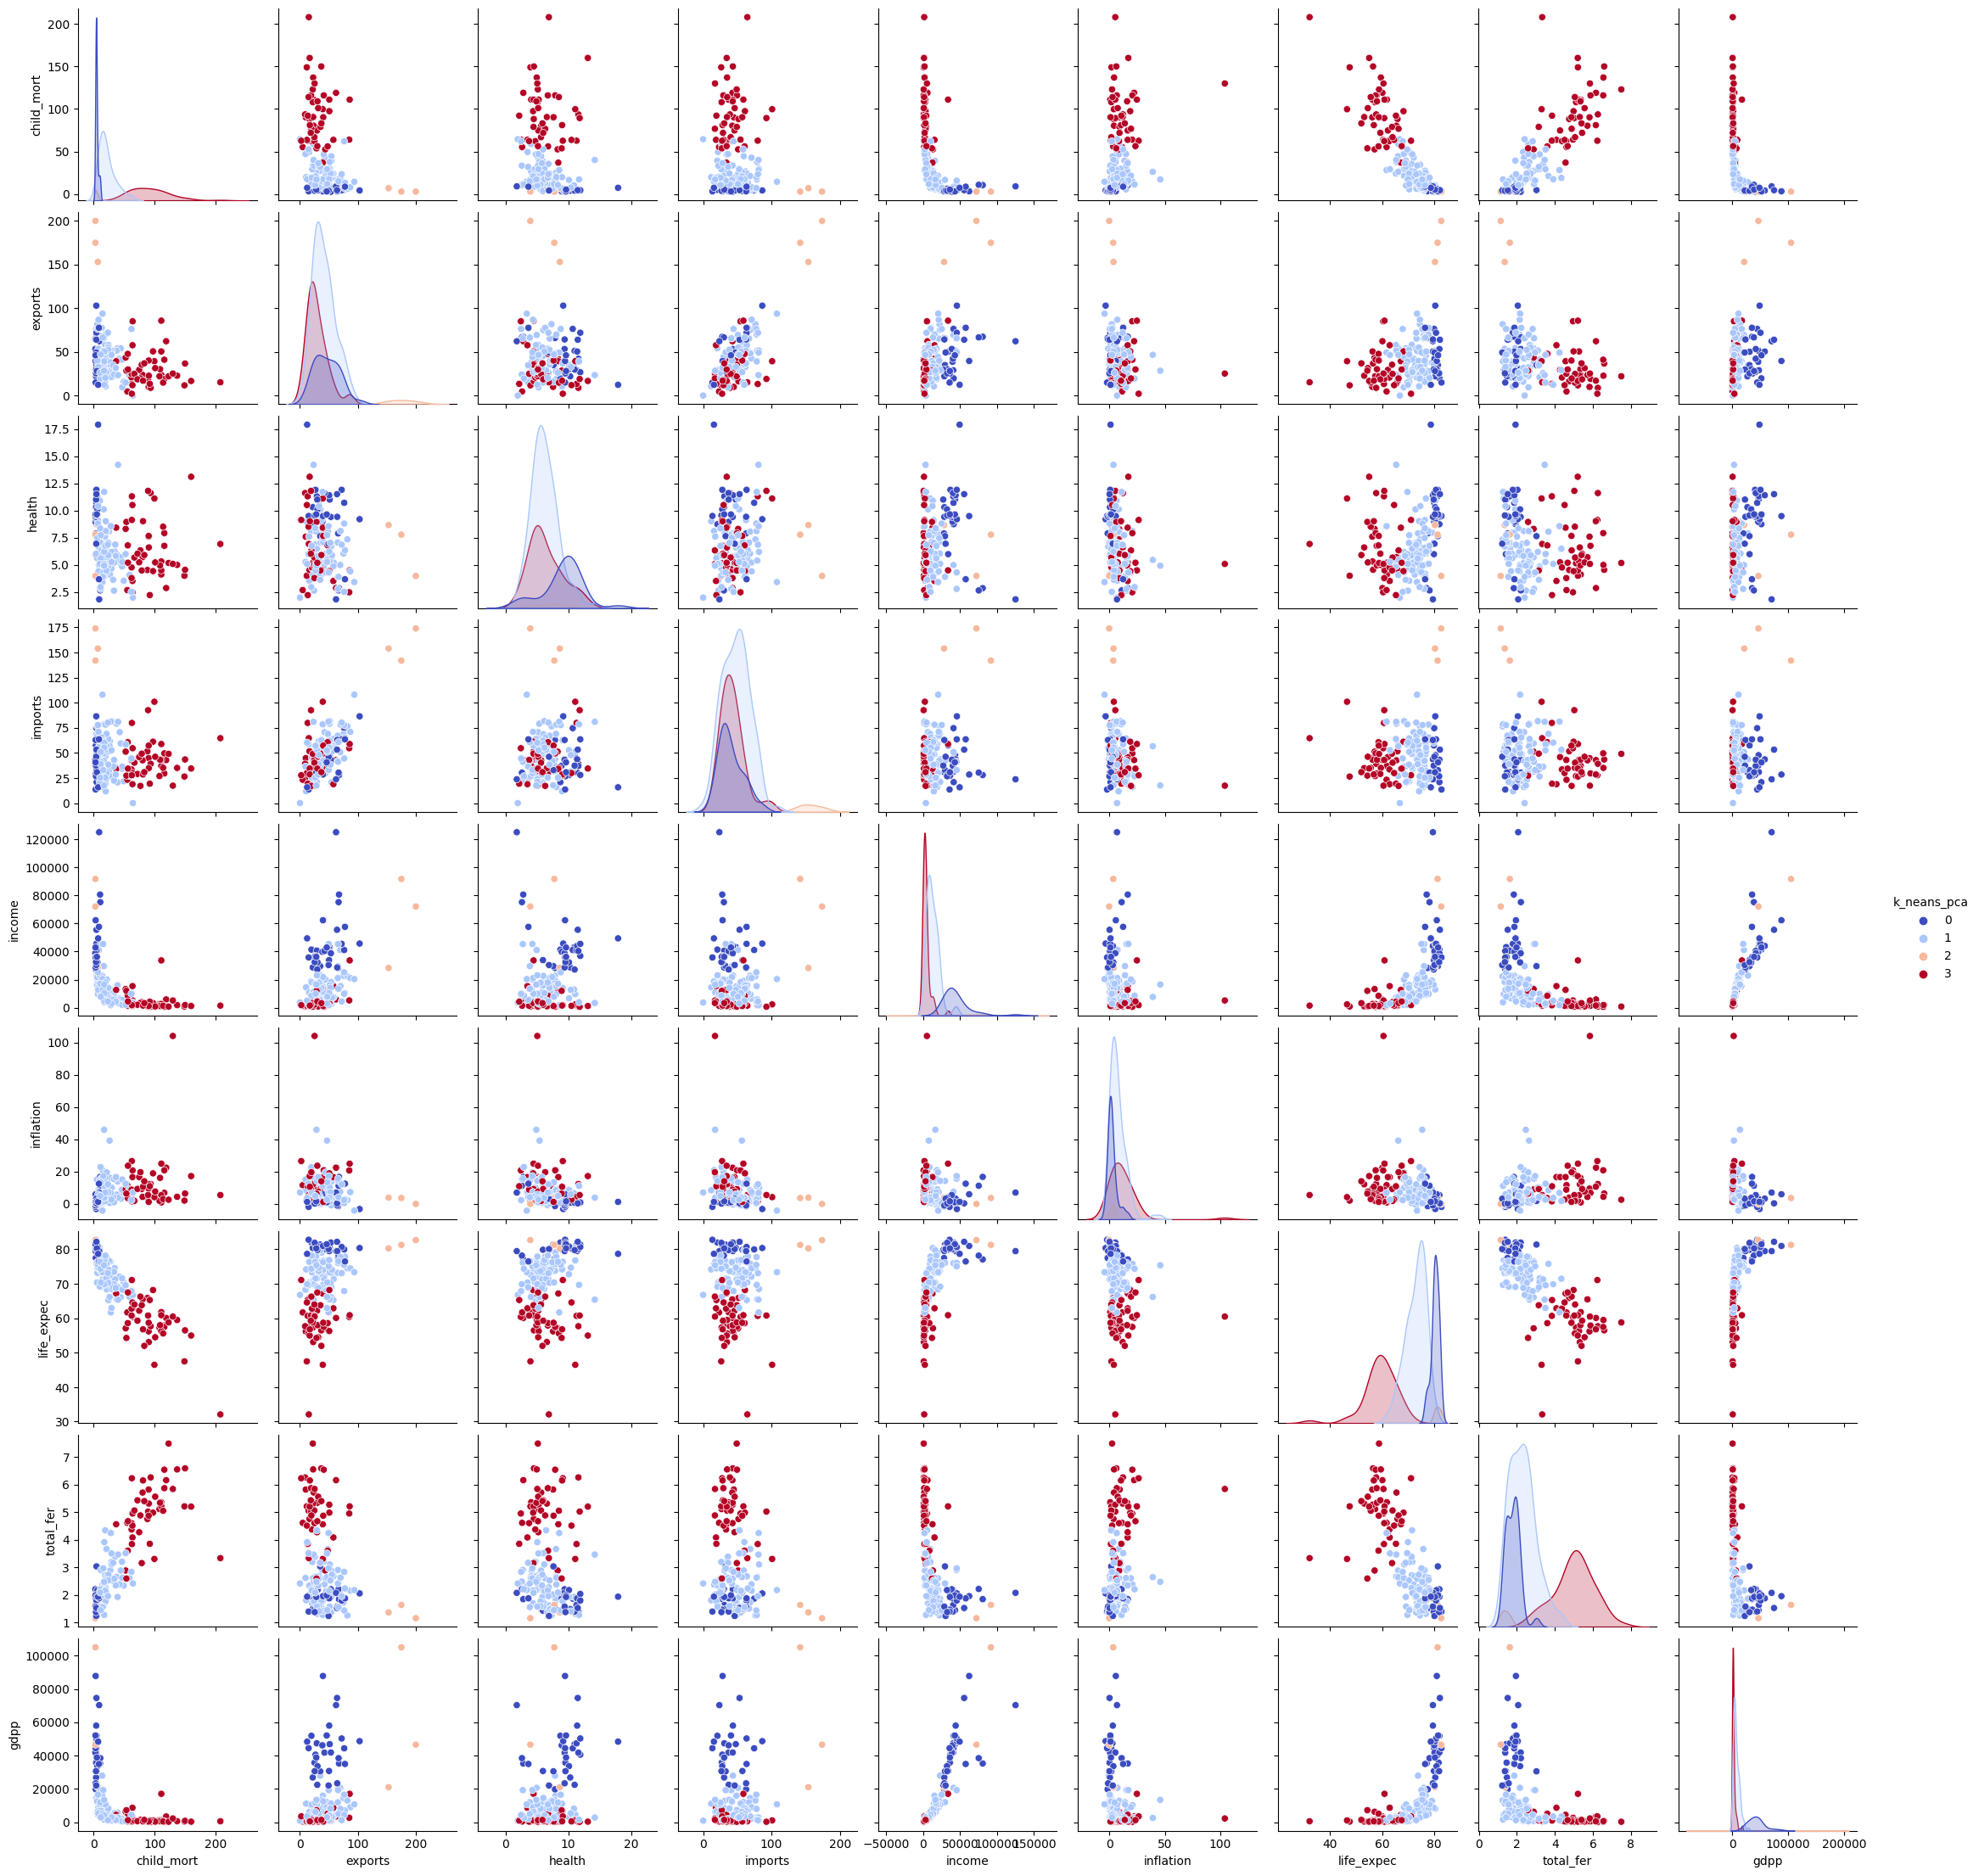

In [ ]:
plt.figure(figsize = (10,10))
sns.pairplot(data = df_country[[ 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_neans_pca']], hue = "k_neans_pca", palette = "coolwarm")
plt.show()

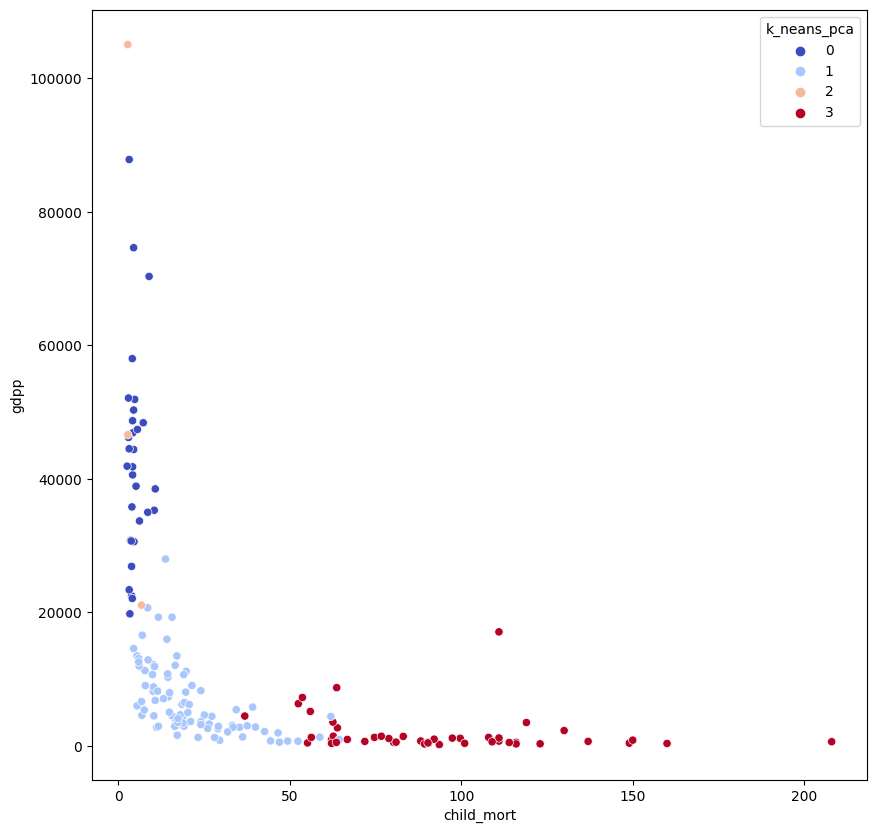

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df_country, x = "child_mort", y = "gdpp", hue = "k_neans_pca", palette = "coolwarm")
plt.show()

In [ ]:
df_country[df_country["k_neans_pca"] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_neans_pca,k_neans,hc_pca,hc,dbscan_pca,dbscan
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,3,1,0,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,0,0,0,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1,3,1,0,0,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,1,3,0,0,0,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,1,3,1,0,0,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,0,0,0,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,3,1,0,-1,-1
